In [1]:
import sqlite3
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
conn=sqlite3.connect('files/dallas-ois.sqlite')

In [3]:
incident=pd.read_sql("SELECT * FROM incidents",conn)
officers=pd.read_sql("SELECT * FROM officers",conn)
subject=pd.read_sql("SELECT * FROM subjects",conn)

In [4]:
len(incident),len(officers),len(subject)

(219, 370, 223)

In [5]:
subject_incidents=pd.read_sql('select * from subjects join incidents on subjects.case_number=incidents.case_number ',conn)

In [6]:
len(subject_incidents)

223

In [7]:
subject_incidents.head()

,case_number,race,gender,last_name,first_name,full_name,case_number,date,location,subject_statuses,...,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
0,44523A,L,M,Curry,James,"Curry, James",44523A,2013-02-23,3000 Chihuahua Street,Injured,...,"Curry, James L/M",1,"Patino, Michael L/M; Fillingim, Brian W/M",2,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, February 23, 2013, at approximate...",NaN,NaN
1,121982X,L,M,Chavez,Gabriel,"Chavez, Gabriel",121982X,2010-05-03,1300 N. Munger Boulevard,Injured,...,"Chavez, Gabriel L/M",1,"Padilla, Gilbert L/M",1,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Monday, May 3, 2010, at approximately 8:06 ...",NaN,NaN
2,605484T,L,M,Salinas,Nick,"Salinas, Nick",605484T,2007-08-12,200 S. Stemmons Freeway,Other,...,"Salinas, Nick L/M",1,"Poston, Jerry W/M",1,See Summary,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Sunday, August 12, 2007, at approximately 2...",NaN,NaN
3,384832T,B,M,Smith,James,"Smith, James",384832T,2007-05-26,7900 S. Loop 12,Shoot and Miss,...,"Smith, James B/M; Dews, Antonio B/M; Spearman,...",3,"Mondy, Michael B/M",1,None,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, May 26, 2007, at approximately 1:...",NaN,NaN
4,384832T,B,M,Dews,Antonio,"Dews, Antonio",384832T,2007-05-26,7900 S. Loop 12,Shoot and Miss,...,"Smith, James B/M; Dews, Antonio B/M; Spearman,...",3,"Mondy, Michael B/M",1,None,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, May 26, 2007, at approximately 1:...",NaN,NaN


In [8]:
subject_incidents.isna().sum()

case_number                     0
race                            0
gender                          0
last_name                       0
first_name                     18
full_name                       0
case_number                     0
date                            0
location                        0
subject_statuses                0
subject_weapon                  0
subjects                        0
subject_count                   0
officers                        0
officer_count                   0
grand_jury_disposition         88
attorney_general_forms_url    221
summary_url                     3
summary_text                    3
latitude                        9
longitude                       9
dtype: int64

In [9]:
subject_incidents.groupby('subject_statuses').count()

,case_number,race,gender,last_name,first_name,full_name,case_number,date,location,subject_weapon,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
subject_statuses,,,,,,,,,,,,,,,,,,,,
1 Deceased 1 Injured,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2
2 Injured,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
Deceased,69,69,69,69,67,69,69,69,69,69,69,69,69,69,67,1,67,67,68,68
Deceased Injured,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2
Injured,60,60,60,60,60,60,60,60,60,60,60,60,60,60,58,1,60,60,57,57
Other,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,0,2,2,1,1
Shoot and Miss,87,87,87,87,71,87,87,87,87,87,87,87,87,87,4,0,86,86,83,83


In [10]:
subject_incidents.groupby('race').count()

,case_number,gender,last_name,first_name,full_name,case_number,date,location,subject_statuses,subject_weapon,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
race,,,,,,,,,,,,,,,,,,,,
A,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,2,2,2,2
B,111,111,111,104,111,111,111,111,111,111,111,111,111,111,67,0,109,109,106,106
L,72,72,72,61,72,72,72,72,72,72,72,72,72,72,37,2,71,71,68,68
W,38,38,38,38,38,38,38,38,38,38,38,38,38,38,31,0,38,38,38,38


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

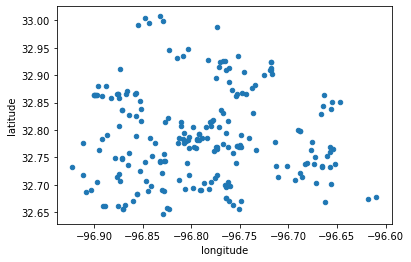

In [11]:
subject_incidents.plot.scatter(x='longitude',y='latitude')

In [14]:
dataset=subject_incidents[['race','subject_statuses','latitude','longitude']].dropna()


In [15]:
len(dataset)

214

In [17]:
mapping={'B':'b','W':'y','A':'r','L':'c'}
dataset['race']=dataset['race'].apply(lambda x:mapping[x])
dataset.head()

,race,subject_statuses,latitude,longitude
9,c,Deceased,32.68642,-96.908674
10,b,Deceased,32.86400,-96.898998
11,y,Shoot and Miss,32.81482,-96.826787
12,b,Injured,32.77540,-96.767489
13,b,Shoot and Miss,32.74417,-96.828470


In [21]:
import folium

In [22]:
m=folium.Map(location=[32.8,-96.8])

In [23]:
m

In [27]:
for _,row in dataset.iterrows():
    folium.CircleMarker(
        location=[row['latitude'],row['longitude']],
        radius=50,
        popup="Laurelhurst Park",
        color=row['race'],
        fill=True,
        fill_color=row['race']
    ).add_to(m)

In [25]:
m